In [2]:
import h2o
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators import H2ORandomForestEstimator

h2o.init()

db = pd.read_csv('data/lc_db_processed.csv').drop(columns = ['Unnamed: 0', 'smiles', 'pubchem2d'])
db['conc1_mean'] = np.where(db['conc1_mean'].values > 1, 1, 0)

target = 'conc1_mean'
predictors = db.columns.to_list()
predictors.remove(target)
predictors.remove('test_cas')

# categorical to factors
db_h = h2o.H2OFrame(db)
# occorre
for i in db.columns:
    if db[i].dtypes == 'object':
        db_h[i] = db_h[i].asfactor()

db_h['conc1_mean'] = db_h['conc1_mean'].asfactor()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.231-b11, mixed mode)
  Starting server from C:\Users\Simone\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Simone\AppData\Local\Temp\tmp4rzqug42
  JVM stdout: C:\Users\Simone\AppData\Local\Temp\tmp4rzqug42\h2o_Simone_started_from_python.out
  JVM stderr: C:\Users\Simone\AppData\Local\Temp\tmp4rzqug42\h2o_Simone_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Europe/Berlin
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.5
H2O_cluster_version_age:,2 months and 26 days
H2O_cluster_name:,H2O_from_python_Simone_1fh6ra
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.643 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%


# First model

In [26]:
from h2o.estimators import H2ORandomForestEstimator
train, test = db_h.split_frame(ratios = [0.7])

drf_all = H2ORandomForestEstimator(nfolds = 3, seed = 123, categorical_encoding = 'onehotexplicit',
                                  binomial_double_trees = True)
drf_all.train(x = predictors, y = target, training_frame = train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


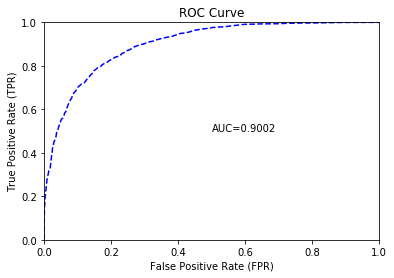


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.135474328744998
RMSE: 0.3680683750948973
LogLoss: 0.4347767506648101
Mean Per-Class Error: 0.18389002699591628
AUC: 0.9002464881739136
AUCPR: 0.9313808953629529
Gini: 0.8004929763478272

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5364736337073053: 


,,0,1,Error,Rate
0,0,2109.0,957.0,0.3121,(957.0/3066.0)
1,1,448.0,4506.0,0.0904,(448.0/4954.0)
2,Total,2557.0,5463.0,0.1752,(1405.0/8020.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.536474,0.865124,218.0
1,max f2,0.353002,0.924419,295.0
2,max f0point5,0.665452,0.868134,156.0
3,max accuracy,0.569136,0.827681,204.0
4,max precision,0.942340,1.000000,0.0
5,max recall,0.167155,1.000000,368.0
6,max specificity,0.942340,1.000000,0.0
7,max absolute_mcc,0.569136,0.630641,204.0
8,max min_per_class_accuracy,0.637637,0.814291,171.0
9,max mean_per_class_accuracy,0.644166,0.816110,168.0



Gains/Lift Table: Avg response rate: 61,77 %, avg score: 62,43 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010100,0.914068,1.618894,1.618894,1.000000,0.927822,1.000000,0.927822,0.016350,0.016350,61.889382,61.889382
1,,2,0.020075,0.902264,1.598658,1.608839,0.987500,0.907458,0.993789,0.917703,0.015947,0.032297,59.865765,60.883858
2,,3,0.030050,0.893412,1.618894,1.612176,1.000000,0.897742,0.995851,0.911077,0.016149,0.048446,61.889382,61.217642
3,,4,0.040025,0.884866,1.618894,1.613851,1.000000,0.888892,0.996885,0.905548,0.016149,0.064594,61.889382,61.385054
4,,5,0.050000,0.880431,1.618894,1.614857,1.000000,0.882562,0.997506,0.900962,0.016149,0.080743,61.889382,61.485668
5,,6,0.100000,0.862596,1.602745,1.608801,0.990025,0.870931,0.993766,0.885946,0.080137,0.160880,60.274526,60.880097
6,,7,0.150000,0.848374,1.558337,1.591980,0.962594,0.855727,0.983375,0.875873,0.077917,0.238797,55.833670,59.197955
7,,8,0.200000,0.832587,1.522002,1.574485,0.940150,0.840836,0.972569,0.867114,0.076100,0.314897,52.200242,57.448526
8,,9,0.300000,0.795803,1.501817,1.550262,0.927681,0.814789,0.957606,0.849672,0.150182,0.465079,50.181671,55.026241
9,,10,0.400000,0.749121,1.404925,1.513928,0.867830,0.773023,0.935162,0.830510,0.140493,0.605571,40.492531,51.392814


In [32]:
perf = drf_all.model_performance(test)
perf.plot(type = 'roc')
perf

# Maximum Depth tuning

In [4]:
# splitting
train, test = db_h.split_frame(ratios = [0.7])


# dizionario dei parametri per il grid-search
hyper_params = {'max_depth': [int(i) for i in np.linspace(5,40,10)]}

drf_grid = H2ORandomForestEstimator(max_runtime_secs = 3600, seed = 123, nfolds = 3, stopping_rounds = 5,
                                    stopping_metric = "RMSE", stopping_tolerance = 1e-4,
                                    categorical_encoding = 'eigen')

# grid search
grid = H2OGridSearch(drf_grid, hyper_params, grid_id = 'depth_grid1', search_criteria = {'strategy': "Cartesian"})
grid.train(x = predictors, y = target, training_frame = train)
grid

drf Grid Build progress: |████████████████████████████████████████████████| 100%
    max_depth             model_ids              logloss
0          16   depth_grid1_model_4  0.30193921891144615
1          20   depth_grid1_model_5    0.315227545012759
2          24   depth_grid1_model_6  0.32803567366862246
3          12   depth_grid1_model_3  0.32947912600284873
4          28   depth_grid1_model_7   0.3320370271707092
5          32   depth_grid1_model_8   0.3338198451701711
6          40  depth_grid1_model_10   0.3338258656761647
7          36   depth_grid1_model_9  0.33382609575991284
8           8   depth_grid1_model_2   0.4028942912341556
9           5   depth_grid1_model_1  0.47336745334982105


In [7]:
# SUL TRAIN
grid.get_grid(sort_by = 'accuracy', decreasing = True)

    max_depth             model_ids            accuracy
0          20   depth_grid1_model_5  0.8766251136910813
1          28   depth_grid1_model_7  0.8758760900968381
2          24   depth_grid1_model_6  0.8757690867262319
3          40  depth_grid1_model_10  0.8756620833556257
4          36   depth_grid1_model_9  0.8756620833556257
5          32   depth_grid1_model_8  0.8756085816703226
6          16   depth_grid1_model_4  0.8735755176288054
7          12   depth_grid1_model_3  0.8629821839387941
8           8   depth_grid1_model_2  0.8275640682681504
9           5   depth_grid1_model_1  0.7819806323899203


In [9]:
sorted_grid = grid.get_grid(sort_by='auc',decreasing=True)
max_depths = sorted_grid.sorted_metric_table()['max_depth'][0:5]
new_max = int(max(max_depths, key=int))
new_min = int(min(max_depths, key=int))

print("MaxDepth", new_max)
print("MinDepth", new_min)

MaxDepth 32
MinDepth 16


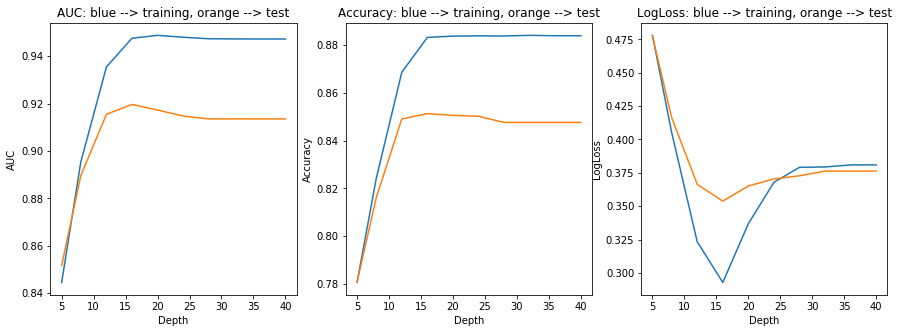

In [21]:
md_lst = list()

auc_test_lst = list()
auc_tr_lst = list()

accuracy_test = list()
accuracy_train = list()

ll_test = list()
ll_train = list()

for i in range(0,10):
    model = h2o.get_model(sorted_grid.sorted_metric_table()['model_ids'][i])
    performance_test_model = model.model_performance(test)
    performance_train_model = model.model_performance()
    
    md_lst.append(model.actual_params['max_depth'])
    
    auc_test_lst.append(performance_test_model.auc())
    auc_tr_lst.append(performance_train_model.auc())
    
    accuracy_test.append(performance_test_model.accuracy()[0][1])
    accuracy_train.append(performance_train_model.accuracy()[0][1])
    
    ll_test.append(performance_test_model.logloss())
    ll_train.append(performance_train_model.logloss())
    
tmp = pd.DataFrame({'depth':md_lst,
              'logloss_train':ll_train,
              'logloss_test':ll_test,
              'accuracy_train':accuracy_train,
              'accuracy_test':accuracy_test,
              'auc_train':auc_tr_lst, 
              'auc_test':auc_test_lst}).sort_values('depth')


plt.figure(figsize = [15,5])

plt.subplot(1,3,1)
plt.plot(tmp['depth'],tmp['auc_train'])
plt.plot(tmp['depth'],tmp['auc_test'])
plt.xlabel('Depth')
plt.ylabel('AUC')
plt.title('AUC: blue --> training, orange --> test')

plt.subplot(1,3,2)
plt.plot(tmp['depth'],tmp['accuracy_train'])
plt.plot(tmp['depth'],tmp['accuracy_test'])
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy: blue --> training, orange --> test')

plt.subplot(1,3,3)
plt.plot(tmp['depth'],tmp['logloss_train'])
plt.plot(tmp['depth'],tmp['logloss_test'])
plt.xlabel('Depth')
plt.ylabel('LogLoss')
plt.title('LogLoss: blue --> training, orange --> test')

plt.show()

# MEGA GRID -- BINARY

In [2]:
from time import ctime
print(ctime())
# splitting
train, test = db_h.split_frame(ratios = [0.7])

import math

hyper_params_tune = {'max_depth' : [10,12,15,17,20,23],
                'sample_rate': [x/100. for x in range(20,101)],
                'col_sample_rate_per_tree': [x/100. for x in range(20,101)],
                'col_sample_rate_change_per_level': [x/100. for x in range(90,111)],
                'min_rows': [2**x for x in range(0,int(math.log(train.nrow,2)-1)+1)],
                'nbins': [2**x for x in range(4,11)],
                'nbins_cats': [2**x for x in range(4,13)],
                'min_split_improvement': [0,1e-8,1e-6,1e-4],
                'histogram_type': ["UniformAdaptive","QuantilesGlobal","RoundRobin"]}

search_criteria_tune = {'strategy': "RandomDiscrete",
                   'max_runtime_secs': 3600,  ## limit the runtime to 60 minutes
                   'max_models': 90,  ## build no more than 100 models
                   'seed' : 1234,
                   'stopping_rounds' : 5,
                   'stopping_metric' : "rmse",
                   'stopping_tolerance': 1e-4
                   }

gbm_grid_all = H2ORandomForestEstimator(ntrees = 1000, max_runtime_secs = 3600, seed = 123, 
                                        categorical_encoding = 'eigen')

gall = H2OGridSearch(gbm_grid_all, hyper_params_tune, grid_id = 'final_grid', search_criteria = search_criteria_tune)

gall.train(x=predictors,y=target, max_runtime_secs = 3600, training_frame = train)
print(ctime())
gall


Tue Sep  1 12:42:09 2020
drf Grid Build progress: |████████████████████████████████████████████████| 100%
Tue Sep  1 13:32:48 2020
      col_sample_rate_change_per_level col_sample_rate_per_tree  \
0                                 1.08                     0.81   
1                                 1.09                     0.76   
2                                  1.0                     0.67   
3                                 1.08                     0.45   
4                                 1.09                     0.91   
.. ..                              ...                      ...   
85                                 0.9                     0.82   
86                                1.07                     0.73   
87                                1.04                     0.26   
88                                1.06                     0.27   
89                                0.93                     0.38   

     histogram_type max_depth min_rows min_split_improvement nbi

In [2]:
# This is the best model -- categorical encoding EIGEN
train, test = db_h.split_frame(ratios = [0.7])

drf = H2ORandomForestEstimator(nfolds = 3, ntrees = 1000, seed = 123,
                               categorical_encoding = 'eigen',col_sample_rate_change_per_level = 1.08,
                               col_sample_rate_per_tree = 0.81, histogram_type = 'QuantilesGlobal',
                               max_depth = 20, min_rows = 1.0, min_split_improvement = 0,
                               nbins= 256, nbins_cats = 128, sample_rate = 0.66)
drf.train(x = predictors, y = target, training_frame = train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [11]:
print(drf)
drf.model_performance(test)

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1598961131177_1


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,1000.0,1000.0,23697820.0,20.0,20.0,20.0,1337.0,2353.0,1881.501




ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.07149702893027418
RMSE: 0.2673892834993096
LogLoss: 0.24394844576171296
Mean Per-Class Error: 0.09873165348817592
AUC: 0.9616822348536257
AUCPR: 0.9737267531600575
Gini: 0.9233644697072514

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.46479779884676403: 


,,0,1,Error,Rate
0,0,6017.0,1121.0,0.157,(1121.0/7138.0)
1,1,669.0,11045.0,0.0571,(669.0/11714.0)
2,Total,6686.0,12166.0,0.095,(1790.0/18852.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.464798,0.925042,225.0
1,max f2,0.225581,0.947850,298.0
2,max f0point5,0.703820,0.934965,152.0
3,max accuracy,0.464798,0.905050,225.0
4,max precision,0.999776,1.000000,0.0
5,max recall,0.001328,1.000000,398.0
6,max specificity,0.999776,1.000000,0.0
7,max absolute_mcc,0.544083,0.797195,202.0
8,max min_per_class_accuracy,0.610609,0.900953,183.0
9,max mean_per_class_accuracy,0.625625,0.901268,179.0



Gains/Lift Table: Avg response rate: 62,14 %, avg score: 61,82 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010025,0.999848,1.609356,1.609356,1.000000,0.999967,1.000000,0.999967,0.016135,0.016135,60.935633,60.935633
1,,2,0.020051,0.999539,1.600841,1.605099,0.994709,0.999708,0.997354,0.999838,0.016049,0.032184,60.084121,60.509877
2,,3,0.030023,0.999147,1.609356,1.606513,1.000000,0.999354,0.998233,0.999677,0.016049,0.048233,60.935633,60.651294
3,,4,0.040049,0.998604,1.600841,1.605093,0.994709,0.998917,0.997351,0.999487,0.016049,0.064282,60.084121,60.509313
4,,5,0.050021,0.997811,1.600796,1.604236,0.994681,0.998234,0.996819,0.999237,0.015964,0.080246,60.079592,60.423642
5,,6,0.100042,0.993570,1.597410,1.600823,0.992577,0.995702,0.994698,0.997470,0.079904,0.160150,59.740988,60.082315
6,,7,0.150011,0.988621,1.592272,1.597975,0.989384,0.991247,0.992928,0.995397,0.079563,0.239713,59.227186,59.797474
7,,8,0.200032,0.981853,1.578637,1.593139,0.980912,0.985580,0.989923,0.992942,0.078965,0.318679,57.863690,59.313900
8,,9,0.300021,0.958508,1.580328,1.588869,0.981963,0.971829,0.987270,0.985906,0.158016,0.476695,58.032815,58.886947
9,,10,0.400011,0.910295,1.559838,1.581612,0.969231,0.937174,0.982761,0.973724,0.155967,0.632662,55.983767,58.161248




ModelMetricsBinomial: drf
** Reported on cross-validation data. **

MSE: 0.08146655231211082
RMSE: 0.285423461390459
LogLoss: 0.2725080062292071
Mean Per-Class Error: 0.11439700457810376
AUC: 0.950758523649932
AUCPR: 0.9657657467309938
Gini: 0.9015170472998639

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5046596836279855: 


,,0,1,Error,Rate
0,0,5974.0,1164.0,0.1631,(1164.0/7138.0)
1,1,882.0,10832.0,0.0753,(882.0/11714.0)
2,Total,6856.0,11996.0,0.1085,(2046.0/18852.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.504660,0.913707,213.0
1,max f2,0.234887,0.942775,297.0
2,max f0point5,0.698669,0.921140,151.0
3,max accuracy,0.512809,0.891470,211.0
4,max precision,0.999614,1.000000,0.0
5,max recall,0.001408,1.000000,398.0
6,max specificity,0.999614,1.000000,0.0
7,max absolute_mcc,0.512809,0.768127,211.0
8,max min_per_class_accuracy,0.620136,0.885009,179.0
9,max mean_per_class_accuracy,0.614515,0.885603,181.0



Gains/Lift Table: Avg response rate: 62,14 %, avg score: 61,80 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010025,0.999508,1.609356,1.609356,1.000000,0.999777,1.000000,0.999777,0.016135,0.016135,60.935633,60.935633
1,,2,0.020104,0.998846,1.609356,1.609356,1.000000,0.999188,1.000000,0.999482,0.016220,0.032354,60.935633,60.935633
2,,3,0.030023,0.998159,1.600750,1.606513,0.994652,0.998512,0.998233,0.999161,0.015878,0.048233,60.075014,60.651294
3,,4,0.040049,0.997387,1.609356,1.607225,1.000000,0.997773,0.998675,0.998814,0.016135,0.064367,60.935633,60.722473
4,,5,0.050021,0.996442,1.600796,1.605943,0.994681,0.996927,0.997879,0.998438,0.015964,0.080331,60.079592,60.594306
5,,6,0.100042,0.991583,1.590583,1.598263,0.988335,0.994137,0.993107,0.996287,0.079563,0.159894,59.058335,59.826320
6,,7,0.150011,0.985413,1.583730,1.593422,0.984076,0.988672,0.990099,0.993751,0.079136,0.239030,58.372963,59.342210
7,,8,0.200032,0.976969,1.573517,1.588445,0.977731,0.981326,0.987006,0.990644,0.078709,0.317739,57.351700,58.844451
8,,9,0.300021,0.949102,1.563253,1.580049,0.971353,0.964553,0.981789,0.981948,0.156309,0.474048,56.325275,58.004874
9,,10,0.400011,0.895345,1.529956,1.567527,0.950663,0.924576,0.974009,0.967607,0.152979,0.627027,52.995572,56.752715




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid
0,accuracy,0.89220625,9.501546E-4,0.8925646,0.89292514,0.891129
1,auc,0.950792,0.0015933092,0.9494931,0.9503131,0.95256984
2,aucpr,0.96582484,7.882762E-4,0.96627927,0.9649146,0.96628064
3,err,0.10779375,9.501546E-4,0.10743541,0.10707487,0.10887097
4,err_count,677.3333,4.041452,682.0,675.0,675.0
5,f0point5,0.9081322,0.00135029,0.9096674,0.9076006,0.9071286
6,f1,0.91415966,0.0029390224,0.9162368,0.9154453,0.9107969
7,f2,0.92027456,0.005012128,0.9229018,0.92342687,0.914495
8,lift_top_group,1.6101911,0.03637199,1.5783192,1.6024402,1.6498138
9,logloss,0.27249864,0.0013958494,0.27408877,0.27193165,0.27147552



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2020-09-01 13:59:17,6 min 46.572 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-09-01 13:59:18,6 min 47.400 sec,1.0,0.368938,3.875069,0.855754,0.872460,1.428812,0.146254
2,,2020-09-01 13:59:18,6 min 47.603 sec,2.0,0.355240,3.004585,0.875300,0.886822,1.452967,0.151034
3,,2020-09-01 13:59:18,6 min 47.884 sec,3.0,0.353329,2.947308,0.877739,0.891870,1.462489,0.150354
4,,2020-09-01 13:59:19,6 min 48.118 sec,4.0,0.348104,2.655977,0.883583,0.897616,1.471708,0.149095
5,,2020-09-01 13:59:19,6 min 48.353 sec,5.0,0.338999,2.371314,0.892407,0.906485,1.486515,0.142239
6,,2020-09-01 13:59:19,6 min 48.556 sec,6.0,0.331532,2.132371,0.901011,0.915902,1.502976,0.137489
7,,2020-09-01 13:59:19,6 min 48.775 sec,7.0,0.324287,1.916270,0.907084,0.920764,1.509251,0.132156
8,,2020-09-01 13:59:20,6 min 48.978 sec,8.0,0.317374,1.682031,0.914114,0.926976,1.518921,0.126876
9,,2020-09-01 13:59:20,6 min 49.197 sec,9.0,0.315527,1.504480,0.916956,0.929599,1.523625,0.125882



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,LogP,547006.375000,1.000000,0.194539
1,Mol,503203.093750,0.919922,0.178961
2,species.Eigen,350758.500000,0.641233,0.124745
3,bonds_number,268175.062500,0.490259,0.095375
4,MorganDensity,236024.375000,0.431484,0.083940
5,atom_number,173347.062500,0.316901,0.061650
6,ring_number,118559.906250,0.216743,0.042165
7,alone_atom_number,102969.140625,0.188241,0.036620
8,doubleBond,88125.726562,0.161105,0.031341
9,obs_duration_mean,77745.179688,0.142128,0.027650



See the whole table with table.as_data_frame()


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.10511554227123003
RMSE: 0.32421527149600776
LogLoss: 0.34283674821917015
Mean Per-Class Error: 0.1442290591857045
AUC: 0.9266711702100873
AUCPR: 0.9497010021802819
Gini: 0.8533423404201745

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5092126301622484: 


,,0,1,Error,Rate
0,0,2483.0,602.0,0.1951,(602.0/3085.0)
1,1,520.0,4372.0,0.1063,(520.0/4892.0)
2,Total,3003.0,4974.0,0.1407,(1122.0/7977.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.509213,0.886276,216.0
1,max f2,0.284727,0.924306,295.0
2,max f0point5,0.679290,0.900420,160.0
3,max accuracy,0.523413,0.859722,212.0
4,max precision,0.997818,1.000000,0.0
5,max recall,0.002966,1.000000,398.0
6,max specificity,0.997818,1.000000,0.0
7,max absolute_mcc,0.523413,0.703742,212.0
8,max min_per_class_accuracy,0.570901,0.854047,196.0
9,max mean_per_class_accuracy,0.614439,0.855771,182.0



Gains/Lift Table: Avg response rate: 61,33 %, avg score: 59,79 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.011157,0.990008,1.612300,1.612300,0.988764,0.991184,0.988764,0.991184,0.017989,0.017989,61.229983,61.229983
1,,2,0.020058,0.987085,1.630621,1.620430,1.000000,0.988420,0.993750,0.989957,0.014513,0.032502,63.062142,62.043004
2,,3,0.030337,0.984604,1.610736,1.617145,0.987805,0.985719,0.991736,0.988521,0.016558,0.049060,61.073580,61.714521
3,,4,0.040115,0.982833,1.630621,1.620430,1.000000,0.983628,0.993750,0.987329,0.015944,0.065004,63.062142,62.043004
4,,5,0.050019,0.981884,1.589340,1.614274,0.974684,0.982407,0.989975,0.986354,0.015740,0.080744,58.933987,61.427434
5,,6,0.100038,0.974472,1.606101,1.610188,0.984962,0.978399,0.987469,0.982377,0.080335,0.161079,60.610080,61.018757
6,,7,0.150683,0.961895,1.598332,1.606203,0.980198,0.968305,0.985025,0.977647,0.080948,0.242028,59.833189,60.620280
7,,8,0.200075,0.944986,1.585096,1.600992,0.972081,0.953055,0.981830,0.971576,0.078291,0.320319,58.509646,60.099234
8,,9,0.299987,0.897819,1.579473,1.593825,0.968632,0.922791,0.977434,0.955328,0.157809,0.478128,57.947270,59.382512
9,,10,0.400401,0.823916,1.508477,1.572421,0.925094,0.864748,0.964308,0.932612,0.151472,0.629599,50.847750,57.242141


In [4]:
# This is the best model -- categorical encoding ONE HOT
train, test = db_h.split_frame(ratios = [0.7])

drf1 = H2ORandomForestEstimator(nfolds = 3, ntrees = 1000, seed = 123,
                               categorical_encoding = 'onehotexplicit',col_sample_rate_change_per_level = 1.08,
                               col_sample_rate_per_tree = 0.81, histogram_type = 'QuantilesGlobal',
                               max_depth = 20, min_rows = 1.0, min_split_improvement = 0,
                               nbins= 256, nbins_cats = 128, sample_rate = 0.66)
drf1.train(x = predictors, y = target, training_frame = train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [7]:
print(drf1)
drf1.model_performance(test)

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1598961131177_259


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,1000.0,1000.0,15282200.0,20.0,20.0,20.0,536.0,1721.0,1203.672




ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.0793750032581755
RMSE: 0.28173569752194255
LogLoss: 0.28019097171351104
Mean Per-Class Error: 0.10098432474797425
AUC: 0.9602235113208356
AUCPR: 0.97137290369505
Gini: 0.9204470226416712

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5264647195244506: 


,,0,1,Error,Rate
0,0,6078.0,1111.0,0.1545,(1111.0/7189.0)
1,1,647.0,11046.0,0.0553,(647.0/11693.0)
2,Total,6725.0,12157.0,0.0931,(1758.0/18882.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.526465,0.926289,203.0
1,max f2,0.347364,0.948723,262.0
2,max f0point5,0.675420,0.929482,157.0
3,max accuracy,0.526465,0.906895,203.0
4,max precision,0.987192,1.000000,0.0
5,max recall,0.041591,1.000000,385.0
6,max specificity,0.987192,1.000000,0.0
7,max absolute_mcc,0.526465,0.801188,203.0
8,max min_per_class_accuracy,0.630713,0.898039,172.0
9,max mean_per_class_accuracy,0.628789,0.899016,173.0



Gains/Lift Table: Avg response rate: 61,93 %, avg score: 61,85 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010010,0.972721,1.606268,1.606268,0.994709,0.976789,0.994709,0.976789,0.016078,0.016078,60.626830,60.626830
1,,2,0.020019,0.968326,1.606268,1.606268,0.994709,0.970365,0.994709,0.973577,0.016078,0.032156,60.626830,60.626830
2,,3,0.030029,0.964249,1.606268,1.606268,0.994709,0.966212,0.994709,0.971122,0.016078,0.048234,60.626830,60.626830
3,,4,0.040038,0.960968,1.606268,1.606268,0.994709,0.962599,0.994709,0.968991,0.016078,0.064312,60.626830,60.626830
4,,5,0.050048,0.958528,1.606268,1.606268,0.994709,0.959724,0.994709,0.967138,0.016078,0.080390,60.626830,60.626830
5,,6,0.100042,0.948086,1.599417,1.602844,0.990466,0.953042,0.992589,0.960094,0.079962,0.160352,59.941682,60.284438
6,,7,0.150037,0.937467,1.597706,1.601132,0.989407,0.942992,0.991528,0.954395,0.079877,0.240229,59.770622,60.113226
7,,8,0.200032,0.925238,1.601127,1.601131,0.991525,0.931317,0.991528,0.948627,0.080048,0.320277,60.112743,60.113105
8,,9,0.300021,0.894104,1.575468,1.592578,0.975636,0.910480,0.986231,0.935914,0.157530,0.477807,57.546834,59.257833
9,,10,0.400011,0.843585,1.541256,1.579749,0.954449,0.870854,0.978287,0.919651,0.154109,0.631917,54.125621,57.974950




ModelMetricsBinomial: drf
** Reported on cross-validation data. **

MSE: 0.08737096582338988
RMSE: 0.29558580111938715
LogLoss: 0.30133125041922426
Mean Per-Class Error: 0.11531176945516586
AUC: 0.9506477958256422
AUCPR: 0.9647874070313962
Gini: 0.9012955916512844

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.534036667035101: 


,,0,1,Error,Rate
0,0,5933.0,1256.0,0.1747,(1256.0/7189.0)
1,1,775.0,10918.0,0.0663,(775.0/11693.0)
2,Total,6708.0,12174.0,0.1076,(2031.0/18882.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.534037,0.914903,205.0
1,max f2,0.324891,0.943827,277.0
2,max f0point5,0.679070,0.919942,157.0
3,max accuracy,0.548234,0.892596,201.0
4,max precision,0.983778,1.000000,0.0
5,max recall,0.031237,1.000000,392.0
6,max specificity,0.983778,1.000000,0.0
7,max absolute_mcc,0.548234,0.770706,201.0
8,max min_per_class_accuracy,0.635677,0.882921,173.0
9,max mean_per_class_accuracy,0.605801,0.884688,182.0



Gains/Lift Table: Avg response rate: 61,93 %, avg score: 61,87 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010010,0.972250,1.606268,1.606268,0.994709,0.976208,0.994709,0.976208,0.016078,0.016078,60.626830,60.626830
1,,2,0.020019,0.967125,1.614812,1.610540,1.000000,0.969647,0.997354,0.972927,0.016164,0.032242,61.481228,61.054029
2,,3,0.030029,0.962805,1.606268,1.609116,0.994709,0.965017,0.996473,0.970291,0.016078,0.048320,60.626830,60.911629
3,,4,0.040038,0.960078,1.597724,1.606268,0.989418,0.961285,0.994709,0.968039,0.015992,0.064312,59.772432,60.626830
4,,5,0.050048,0.957363,1.606268,1.606268,0.994709,0.958710,0.994709,0.966173,0.016078,0.080390,60.626830,60.626830
5,,6,0.100042,0.945977,1.594285,1.600280,0.987288,0.951624,0.991001,0.958903,0.079706,0.160096,59.428501,60.027983
6,,7,0.150037,0.934710,1.602838,1.601132,0.992585,0.940510,0.991528,0.952774,0.080133,0.240229,60.283804,60.113226
7,,8,0.200032,0.920250,1.587443,1.597711,0.983051,0.927639,0.989410,0.946492,0.079364,0.319593,58.744258,59.771075
8,,9,0.300021,0.885497,1.563494,1.586307,0.968220,0.903958,0.982348,0.932316,0.156333,0.475926,56.349409,58.630721
9,,10,0.400011,0.834798,1.507899,1.566708,0.933792,0.861299,0.970211,0.914564,0.150774,0.626700,50.789939,56.670785




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid
0,accuracy,0.8929124,0.004110139,0.8897625,0.8975617,0.8914129
1,auc,0.9506311,0.0032547475,0.94734836,0.9538571,0.95068765
2,aucpr,0.9648459,7.578662E-4,0.9649106,0.9655693,0.96405774
3,err,0.1070876,0.004110139,0.11023746,0.10243825,0.10858708
4,err_count,674.0,27.0,701.0,647.0,674.0
5,f0point5,0.9044758,0.002924783,0.9055792,0.9066884,0.9011598
6,f1,0.91523695,0.003277094,0.9135528,0.9190136,0.91314435
7,f2,0.9262662,0.0050546564,0.9216682,0.9316786,0.9254519
8,lift_top_group,1.6065345,0.013391916,1.5917397,1.6178279,1.6100359
9,logloss,0.30134174,0.006758015,0.30562642,0.2935512,0.30484754



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2020-09-01 14:58:01,47 min 45.960 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-09-01 15:06:21,56 min 6.302 sec,1.0,0.398610,1.850842,0.829452,0.851351,1.391668,0.223160
2,,2020-09-01 15:06:22,56 min 6.817 sec,2.0,0.392194,2.097667,0.838073,0.857063,1.410658,0.201821
3,,2020-09-01 15:06:22,56 min 7.328 sec,3.0,0.381715,1.796520,0.850204,0.867184,1.423213,0.193488
4,,2020-09-01 15:06:23,56 min 7.812 sec,4.0,0.362796,1.451204,0.870468,0.883395,1.438128,0.176235
5,,2020-09-01 15:06:23,56 min 8.359 sec,5.0,0.353649,1.294102,0.880988,0.893304,1.452095,0.166413
6,,2020-09-01 15:06:24,56 min 8.781 sec,6.0,0.349133,1.049164,0.887985,0.901720,1.466942,0.164071
7,,2020-09-01 15:06:24,56 min 9.359 sec,7.0,0.340092,0.948855,0.897063,0.909222,1.476993,0.151095
8,,2020-09-01 15:06:29,56 min 13.702 sec,16.0,0.306010,0.390942,0.934965,0.946771,1.535282,0.118757
9,,2020-09-01 15:06:33,56 min 18.054 sec,24.0,0.295252,0.310618,0.945473,0.957794,1.589315,0.110169



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,LogP,416837.125000,1.000000,0.187973
1,Mol,332952.593750,0.798759,0.150145
2,bonds_number,195664.968750,0.469404,0.088235
3,MorganDensity,179420.453125,0.430433,0.080910
4,atom_number,153970.750000,0.369379,0.069433
5,ring_number,98647.976562,0.236658,0.044485
6,alone_atom_number,77074.781250,0.184904,0.034757
7,doubleBond,69130.570312,0.165846,0.031174
8,oh_count,33375.925781,0.080069,0.015051
9,obs_duration_mean,27460.566406,0.065878,0.012383



See the whole table with table.as_data_frame()


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.07858393819700724
RMSE: 0.28032826863698074
LogLoss: 0.27694813070530333
Mean Per-Class Error: 0.10052611252001953
AUC: 0.9623863645570851
AUCPR: 0.9759644425232131
Gini: 0.9247727291141703

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5262712738317522: 


,,0,1,Error,Rate
0,0,2483.0,491.0,0.1651,(491.0/2974.0)
1,1,274.0,4706.0,0.055,(274.0/4980.0)
2,Total,2757.0,5197.0,0.0962,(765.0/7954.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.526271,0.924831,209.0
1,max f2,0.385929,0.950133,253.0
2,max f0point5,0.702580,0.934308,149.0
3,max accuracy,0.566526,0.904828,196.0
4,max precision,0.991152,1.000000,0.0
5,max recall,0.033102,1.000000,392.0
6,max specificity,0.991152,1.000000,0.0
7,max absolute_mcc,0.579179,0.796403,192.0
8,max min_per_class_accuracy,0.630772,0.897445,175.0
9,max mean_per_class_accuracy,0.612747,0.899474,181.0



Gains/Lift Table: Avg response rate: 62,61 %, avg score: 62,34 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010058,0.972977,1.597189,1.597189,1.000000,0.976514,1.000000,0.976514,0.016064,0.016064,59.718876,59.718876
1,,2,0.020116,0.968753,1.597189,1.597189,1.000000,0.970973,1.000000,0.973744,0.016064,0.032129,59.718876,59.718876
2,,3,0.030048,0.964163,1.597189,1.597189,1.000000,0.966136,1.000000,0.971229,0.015863,0.047992,59.718876,59.718876
3,,4,0.040106,0.961559,1.597189,1.597189,1.000000,0.962918,1.000000,0.969145,0.016064,0.064056,59.718876,59.718876
4,,5,0.050038,0.959107,1.597189,1.597189,1.000000,0.960281,1.000000,0.967385,0.015863,0.079920,59.718876,59.718876
5,,6,0.100075,0.948375,1.593176,1.595182,0.997487,0.953621,0.998744,0.960503,0.079719,0.159639,59.317572,59.518224
6,,7,0.149987,0.938780,1.589142,1.593172,0.994962,0.943667,0.997485,0.954900,0.079317,0.238956,58.914246,59.317235
7,,8,0.200025,0.925172,1.581137,1.590162,0.989950,0.932504,0.995600,0.949298,0.079116,0.318072,58.113661,59.016153
8,,9,0.299975,0.895423,1.569062,1.583131,0.982390,0.911332,0.991199,0.936648,0.156827,0.474900,56.906216,58.313135
9,,10,0.400050,0.850069,1.524954,1.568578,0.954774,0.875352,0.982087,0.921314,0.152610,0.627510,52.495409,56.857789


In [8]:
# Decreasing the number of tree to see its behaviour
train, test = db_h.split_frame(ratios = [0.7])

drf2 = H2ORandomForestEstimator(nfolds = 3, ntrees = 500, seed = 123,
                               categorical_encoding = 'onehotexplicit',col_sample_rate_change_per_level = 1.08,
                               col_sample_rate_per_tree = 0.81, histogram_type = 'QuantilesGlobal',
                               max_depth = 20, min_rows = 1.0, min_split_improvement = 0,
                               nbins= 256, nbins_cats = 128, sample_rate = 0.66)
drf2.train(x = predictors, y = target, training_frame = train)
print(drf2)
drf2.model_performance(test)

drf Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1598961131177_851


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,500.0,500.0,7611300.0,20.0,20.0,20.0,564.0,1769.0,1199.108




ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.07938213198287218
RMSE: 0.28174834867816384
LogLoss: 0.2795616495681646
Mean Per-Class Error: 0.10073646300539885
AUC: 0.9610439166805307
AUCPR: 0.9733164756626249
Gini: 0.9220878333610614

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5232902368329554: 


,,0,1,Error,Rate
0,0,6058.0,1141.0,0.1585,(1141.0/7199.0)
1,1,674.0,11011.0,0.0577,(674.0/11685.0)
2,Total,6732.0,12152.0,0.0961,(1815.0/18884.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.523290,0.923858,215.0
1,max f2,0.423248,0.947635,246.0
2,max f0point5,0.703762,0.931103,154.0
3,max accuracy,0.561389,0.904628,203.0
4,max precision,0.995643,1.000000,0.0
5,max recall,0.029358,1.000000,394.0
6,max specificity,0.995643,1.000000,0.0
7,max absolute_mcc,0.561389,0.797131,203.0
8,max min_per_class_accuracy,0.629395,0.898502,180.0
9,max mean_per_class_accuracy,0.616698,0.899264,184.0



Gains/Lift Table: Avg response rate: 61,88 %, avg score: 61,80 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010008,0.974574,1.616089,1.616089,1.000000,0.978515,1.000000,0.978515,0.016175,0.016175,61.608900,61.608900
1,,2,0.020017,0.970317,1.616089,1.616089,1.000000,0.972351,1.000000,0.975433,0.016175,0.032349,61.608900,61.608900
2,,3,0.030025,0.967010,1.616089,1.616089,1.000000,0.968561,1.000000,0.973142,0.016175,0.048524,61.608900,61.608900
3,,4,0.040034,0.964061,1.607538,1.613951,0.994709,0.965505,0.998677,0.971233,0.016089,0.064613,60.753827,61.395132
4,,5,0.050042,0.961639,1.616089,1.614379,1.000000,0.962905,0.998942,0.969567,0.016175,0.080787,61.608900,61.437886
5,,6,0.100032,0.950577,1.602393,1.608389,0.991525,0.956018,0.995236,0.962797,0.080103,0.160890,60.239333,60.838927
6,,7,0.150021,0.939266,1.602393,1.606391,0.991525,0.945152,0.993999,0.956917,0.080103,0.240993,60.239333,60.639133
7,,8,0.200011,0.926807,1.598969,1.604536,0.989407,0.933159,0.992851,0.950979,0.079932,0.320924,59.896942,60.453634
8,,9,0.299989,0.895253,1.579282,1.596120,0.977225,0.911625,0.987643,0.937864,0.157895,0.478819,57.928189,59.611968
9,,10,0.400021,0.844764,1.543369,1.582929,0.955003,0.871589,0.979481,0.921291,0.154386,0.633205,54.336928,58.292859




ModelMetricsBinomial: drf
** Reported on cross-validation data. **

MSE: 0.08536149127653347
RMSE: 0.2921668894254335
LogLoss: 0.2952228083254733
Mean Per-Class Error: 0.11118505678444024
AUC: 0.9550921974079626
AUCPR: 0.9697751546553527
Gini: 0.9101843948159252

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5227788957187159: 


,,0,1,Error,Rate
0,0,5934.0,1265.0,0.1757,(1265.0/7199.0)
1,1,738.0,10947.0,0.0632,(738.0/11685.0)
2,Total,6672.0,12212.0,0.1061,(2003.0/18884.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.522779,0.916182,213.0
1,max f2,0.361827,0.944058,265.0
2,max f0point5,0.724624,0.923580,141.0
3,max accuracy,0.557291,0.894143,200.0
4,max precision,0.988823,1.000000,0.0
5,max recall,0.022982,1.000000,396.0
6,max specificity,0.988823,1.000000,0.0
7,max absolute_mcc,0.557291,0.774689,200.0
8,max min_per_class_accuracy,0.628438,0.887484,177.0
9,max mean_per_class_accuracy,0.613069,0.888815,182.0



Gains/Lift Table: Avg response rate: 61,88 %, avg score: 61,79 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010008,0.974269,1.616089,1.616089,1.000000,0.978271,1.000000,0.978271,0.016175,0.016175,61.608900,61.608900
1,,2,0.020017,0.969649,1.616089,1.616089,1.000000,0.971792,1.000000,0.975032,0.016175,0.032349,61.608900,61.608900
2,,3,0.030025,0.965221,1.616089,1.616089,1.000000,0.967505,1.000000,0.972523,0.016175,0.048524,61.608900,61.608900
3,,4,0.040034,0.961736,1.616089,1.616089,1.000000,0.963339,1.000000,0.970227,0.016175,0.064698,61.608900,61.608900
4,,5,0.050042,0.959370,1.616089,1.616089,1.000000,0.960518,1.000000,0.968285,0.016175,0.080873,61.608900,61.608900
5,,6,0.100032,0.948193,1.604105,1.610100,0.992585,0.953789,0.996294,0.961041,0.080188,0.161061,60.410529,61.010032
6,,7,0.150021,0.936190,1.595545,1.605250,0.987288,0.942306,0.993293,0.954798,0.079760,0.240822,59.554550,60.525043
7,,8,0.200011,0.922550,1.600681,1.604108,0.990466,0.929370,0.992587,0.948443,0.080017,0.320839,60.068137,60.410846
8,,9,0.299989,0.886800,1.573290,1.593837,0.973517,0.906208,0.986231,0.934367,0.157296,0.478134,57.329004,59.383747
9,,10,0.400021,0.835475,1.534814,1.579078,0.949709,0.862283,0.977098,0.916341,0.153530,0.631665,53.481401,57.907770




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid
0,accuracy,0.8950242,0.005637843,0.89479476,0.8895045,0.90077317
1,auc,0.9552233,0.0041920426,0.95328176,0.952354,0.96003413
2,aucpr,0.9698859,0.002192064,0.9681778,0.96912223,0.97235763
3,err,0.104975834,0.005637843,0.10520522,0.110495485,0.0992268
4,err_count,661.0,41.581245,669.0,698.0,616.0
5,f0point5,0.9058665,0.0030621015,0.90577227,0.90285265,0.9089747
6,f1,0.91692054,0.0034039316,0.9170284,0.91346395,0.9202692
7,f2,0.9282478,0.0037703959,0.9285678,0.92432755,0.931848
8,lift_top_group,1.6164458,0.022266796,1.6106889,1.5976226,1.6410257
9,logloss,0.29518425,0.0051002335,0.2973853,0.29881436,0.2893531



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2020-09-01 16:17:07,32 min 52.898 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-09-01 16:25:38,41 min 24.707 sec,1.0,0.373981,2.256597,0.860599,0.878243,1.445803,0.168125
2,,2020-09-01 16:25:39,41 min 25.180 sec,2.0,0.376220,1.897311,0.856763,0.872146,1.427506,0.178695
3,,2020-09-01 16:25:39,41 min 25.732 sec,3.0,0.371124,1.959655,0.861148,0.875494,1.432921,0.171089
4,,2020-09-01 16:25:40,41 min 26.133 sec,4.0,0.363434,1.490533,0.869940,0.883663,1.441452,0.170031
5,,2020-09-01 16:25:40,41 min 26.727 sec,5.0,0.350759,1.348235,0.883036,0.895399,1.457507,0.158362
6,,2020-09-01 16:25:41,41 min 27.180 sec,6.0,0.345410,1.117077,0.889758,0.900584,1.453012,0.155485
7,,2020-09-01 16:25:41,41 min 27.758 sec,7.0,0.337537,0.992960,0.898687,0.909774,1.473445,0.149057
8,,2020-09-01 16:25:46,41 min 31.854 sec,15.0,0.308265,0.390411,0.933630,0.944671,1.534879,0.126194
9,,2020-09-01 16:25:50,41 min 36.003 sec,23.0,0.295193,0.308090,0.945739,0.958116,1.590838,0.113812



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,LogP,212566.312500,1.000000,0.191027
1,Mol,167098.187500,0.786099,0.150166
2,bonds_number,98751.054688,0.464566,0.088744
3,MorganDensity,90310.671875,0.424859,0.081159
4,atom_number,72372.953125,0.340472,0.065039
5,ring_number,51424.968750,0.241924,0.046214
6,alone_atom_number,38887.640625,0.182944,0.034947
7,doubleBond,33996.816406,0.159935,0.030552
8,oh_count,16691.355469,0.078523,0.015000
9,obs_duration_mean,13890.765625,0.065348,0.012483



See the whole table with table.as_data_frame()


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.07902070324178667
RMSE: 0.2811062134528276
LogLoss: 0.27962399683607825
Mean Per-Class Error: 0.10022096215803211
AUC: 0.9589984586489356
AUCPR: 0.9709365758672408
Gini: 0.9179969172978713

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.52300250096653: 


,,0,1,Error,Rate
0,0,2517.0,447.0,0.1508,(447.0/2964.0)
1,1,295.0,4693.0,0.0591,(295.0/4988.0)
2,Total,2812.0,5140.0,0.0933,(742.0/7952.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.523003,0.926738,207.0
1,max f2,0.400346,0.951056,245.0
2,max f0point5,0.637109,0.930032,170.0
3,max accuracy,0.556434,0.906942,197.0
4,max precision,0.992484,1.000000,0.0
5,max recall,0.044928,1.000000,384.0
6,max specificity,0.992484,1.000000,0.0
7,max absolute_mcc,0.556434,0.800631,197.0
8,max min_per_class_accuracy,0.611534,0.897773,178.0
9,max mean_per_class_accuracy,0.559823,0.899779,196.0



Gains/Lift Table: Avg response rate: 62,73 %, avg score: 62,02 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010060,0.974056,1.594226,1.594226,1.000000,0.977569,1.000000,0.977569,0.016038,0.016038,59.422614,59.422614
1,,2,0.020121,0.968954,1.554370,1.574298,0.975000,0.971294,0.987500,0.974432,0.015638,0.031676,55.437049,57.429832
2,,3,0.030055,0.965097,1.553866,1.567545,0.974684,0.967142,0.983264,0.972022,0.015437,0.047113,55.386599,56.754453
3,,4,0.040116,0.962453,1.594226,1.574236,1.000000,0.963811,0.987461,0.969963,0.016038,0.063152,59.422614,57.423585
4,,5,0.050050,0.960677,1.594226,1.578204,1.000000,0.961629,0.989950,0.968309,0.015838,0.078990,59.422614,57.820377
5,,6,0.100101,0.949890,1.582209,1.580207,0.992462,0.955509,0.991206,0.961909,0.079190,0.158180,58.220936,58.020657
6,,7,0.150025,0.939797,1.586195,1.582199,0.994962,0.944877,0.992456,0.956241,0.079190,0.237370,58.619478,58.219929
7,,8,0.200075,0.927813,1.578204,1.581200,0.989950,0.934243,0.991829,0.950738,0.078990,0.316359,57.820377,58.119978
8,,9,0.300050,0.896495,1.542088,1.568168,0.967296,0.913383,0.983655,0.938292,0.154170,0.470529,54.208793,56.816796
9,,10,0.400025,0.846837,1.524040,1.557139,0.955975,0.873775,0.976737,0.922167,0.152366,0.622895,52.404009,55.713946


In [9]:
# trees reduce to half -- one hot encoding
train, test = db_h.split_frame(ratios = [0.7])

drf2 = H2ORandomForestEstimator(nfolds = 3, ntrees = 250, seed = 123,
                               categorical_encoding = 'onehotexplicit',col_sample_rate_change_per_level = 1.08,
                               col_sample_rate_per_tree = 0.81, histogram_type = 'QuantilesGlobal',
                               max_depth = 20, min_rows = 1.0, min_split_improvement = 0,
                               nbins= 256, nbins_cats = 128, sample_rate = 0.66)
drf2.train(x = predictors, y = target, training_frame = train)
print(drf2)
drf2.model_performance(test)

drf Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1598961131177_1270


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,250.0,250.0,3687929.0,20.0,20.0,20.0,626.0,1695.0,1161.972




ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.07952370525227564
RMSE: 0.28199947739716763
LogLoss: 0.27920251961257053
Mean Per-Class Error: 0.10437612499511006
AUC: 0.9596572049491618
AUCPR: 0.9721955459826401
Gini: 0.9193144098983237

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4953129195607285: 


,,0,1,Error,Rate
0,0,5775.0,1303.0,0.1841,(1303.0/7078.0)
1,1,552.0,11229.0,0.0469,(552.0/11781.0)
2,Total,6327.0,12532.0,0.0984,(1855.0/18859.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.495313,0.923703,222.0
1,max f2,0.400967,0.949306,251.0
2,max f0point5,0.711576,0.929363,149.0
3,max accuracy,0.578955,0.902222,196.0
4,max precision,0.992460,1.000000,0.0
5,max recall,0.033147,1.000000,389.0
6,max specificity,0.992460,1.000000,0.0
7,max absolute_mcc,0.578955,0.790927,196.0
8,max min_per_class_accuracy,0.645909,0.894152,173.0
9,max mean_per_class_accuracy,0.592545,0.895624,191.0



Gains/Lift Table: Avg response rate: 62,47 %, avg score: 62,41 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010022,0.976635,1.592328,1.592328,0.994709,0.982293,0.994709,0.982293,0.015958,0.015958,59.232806,59.232806
1,,2,0.020043,0.972073,1.583858,1.588093,0.989418,0.974305,0.992063,0.978299,0.015873,0.031831,58.385823,58.809315
2,,3,0.030012,0.968504,1.583768,1.586657,0.989362,0.970197,0.991166,0.975608,0.015788,0.047619,58.376813,58.665657
3,,4,0.040034,0.964935,1.583858,1.585956,0.989418,0.966819,0.990728,0.973408,0.015873,0.063492,58.385823,58.595606
4,,5,0.050003,0.962096,1.600798,1.588915,1.000000,0.963477,0.992577,0.971428,0.015958,0.079450,60.079789,58.891498
5,,6,0.100005,0.950298,1.594008,1.591461,0.995758,0.955930,0.994168,0.963679,0.079705,0.159155,59.400766,59.146132
6,,7,0.150008,0.939723,1.590613,1.591178,0.993637,0.945134,0.993991,0.957497,0.079535,0.238689,59.061254,59.117840
7,,8,0.200011,0.928010,1.578730,1.588066,0.986214,0.933995,0.992047,0.951622,0.078941,0.317630,57.872963,58.806620
8,,9,0.300016,0.898722,1.571091,1.582408,0.981442,0.914157,0.988512,0.939133,0.157117,0.474747,57.109062,58.240768
9,,10,0.400021,0.851063,1.527803,1.568756,0.954401,0.876343,0.979984,0.923436,0.152788,0.627536,52.780287,56.875647




ModelMetricsBinomial: drf
** Reported on cross-validation data. **

MSE: 0.08522279412206381
RMSE: 0.2919294334630611
LogLoss: 0.2950989126758323
Mean Per-Class Error: 0.1118140475469731
AUC: 0.953302235036856
AUCPR: 0.9676029083655577
Gini: 0.9066044700737119

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5303667936654917: 


,,0,1,Error,Rate
0,0,5823.0,1255.0,0.1773,(1255.0/7078.0)
1,1,723.0,11058.0,0.0614,(723.0/11781.0)
2,Total,6546.0,12313.0,0.1049,(1978.0/18859.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.530367,0.917905,214.0
1,max f2,0.377795,0.945516,262.0
2,max f0point5,0.713386,0.921916,149.0
3,max accuracy,0.537836,0.895116,212.0
4,max precision,0.988288,1.000000,0.0
5,max recall,0.039071,1.000000,387.0
6,max specificity,0.988288,1.000000,0.0
7,max absolute_mcc,0.568208,0.774743,201.0
8,max min_per_class_accuracy,0.641982,0.888104,176.0
9,max mean_per_class_accuracy,0.640176,0.888186,177.0



Gains/Lift Table: Avg response rate: 62,47 %, avg score: 62,38 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010022,0.975014,1.592328,1.592328,0.994709,0.979070,0.994709,0.979070,0.015958,0.015958,59.232806,59.232806
1,,2,0.020043,0.969997,1.583858,1.588093,0.989418,0.972349,0.992063,0.975709,0.015873,0.031831,58.385823,58.809315
2,,3,0.030012,0.965370,1.592283,1.589485,0.994681,0.967588,0.992933,0.973012,0.015873,0.047704,59.228301,58.948484
3,,4,0.040034,0.961852,1.600798,1.592317,1.000000,0.963579,0.994702,0.970650,0.016043,0.063747,60.079789,59.231685
4,,5,0.050056,0.958850,1.600798,1.594015,1.000000,0.960315,0.995763,0.968581,0.016043,0.079789,60.079789,59.401485
5,,6,0.100005,0.946773,1.585504,1.589764,0.990446,0.952178,0.993107,0.960388,0.079195,0.158985,58.550365,58.976376
6,,7,0.150008,0.935638,1.578730,1.586086,0.986214,0.941360,0.990809,0.954046,0.078941,0.237925,57.872963,58.608572
7,,8,0.200011,0.922507,1.573637,1.582974,0.983033,0.929260,0.988865,0.947849,0.078686,0.316611,57.363696,58.297353
8,,9,0.300016,0.890025,1.571939,1.579295,0.981972,0.906951,0.986568,0.934216,0.157202,0.473814,57.193940,57.929548
9,,10,0.400021,0.843301,1.509979,1.561966,0.943266,0.867208,0.975742,0.917464,0.151006,0.624820,50.997850,56.196624




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid
0,accuracy,0.89497674,0.004159021,0.8984252,0.89614713,0.890358
1,auc,0.9532555,0.0015772339,0.9517442,0.95489126,0.95313084
2,aucpr,0.96763366,0.0017038739,0.96659493,0.9696001,0.966706
3,err,0.105023235,0.004159021,0.1015748,0.10385286,0.10964205
4,err_count,660.0,18.027756,645.0,655.0,680.0
5,f0point5,0.90375,0.0023272717,0.90562844,0.904475,0.9011465
6,f1,0.9180648,0.005304225,0.9227452,0.91914576,0.9123033
7,f2,0.93285394,0.008483813,0.94052154,0.93430036,0.92373985
8,lift_top_group,1.593275,0.044088356,1.546075,1.6003553,1.6333948
9,logloss,0.29511184,0.0017359763,0.29430875,0.2939228,0.29710394



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2020-09-01 18:08:56,25 min 40.570 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-09-01 18:17:26,34 min 10.811 sec,1.0,0.379142,2.165229,0.851044,0.873897,1.421474,0.181136
2,,2020-09-01 18:17:27,34 min 11.292 sec,2.0,0.387867,1.791089,0.838691,0.858774,1.385480,0.191036
3,,2020-09-01 18:17:27,34 min 11.696 sec,3.0,0.382134,1.475012,0.848059,0.869136,1.406580,0.191472
4,,2020-09-01 18:17:28,34 min 12.165 sec,4.0,0.367476,1.230816,0.864936,0.881690,1.414038,0.177234
5,,2020-09-01 18:17:28,34 min 12.808 sec,5.0,0.354570,1.196335,0.878691,0.891461,1.421301,0.163083
6,,2020-09-01 18:17:29,34 min 13.340 sec,6.0,0.352437,1.040507,0.882001,0.894747,1.423260,0.163401
7,,2020-09-01 18:17:29,34 min 13.808 sec,7.0,0.345135,0.914241,0.889851,0.900972,1.425127,0.156670
8,,2020-09-01 18:17:33,34 min 17.822 sec,15.0,0.308057,0.409554,0.931969,0.944631,1.523865,0.123486
9,,2020-09-01 18:17:38,34 min 22.179 sec,24.0,0.296823,0.310781,0.944166,0.957190,1.549979,0.111099



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,LogP,108465.945312,1.000000,0.197890
1,Mol,82759.671875,0.763001,0.150990
2,bonds_number,48845.941406,0.450334,0.089117
3,MorganDensity,44893.894531,0.413899,0.081906
4,atom_number,37674.136719,0.347336,0.068734
5,ring_number,23526.574219,0.216903,0.042923
6,alone_atom_number,18047.275391,0.166387,0.032926
7,doubleBond,16586.197266,0.152916,0.030261
8,oh_count,7515.294434,0.069287,0.013711
9,obs_duration_mean,6769.247070,0.062409,0.012350



See the whole table with table.as_data_frame()


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.07888616046679969
RMSE: 0.28086680200194486
LogLoss: 0.2776119187045686
Mean Per-Class Error: 0.09688626023899038
AUC: 0.9614312256573427
AUCPR: 0.9728897449466772
Gini: 0.9228624513146855

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5463000170263378: 


,,0,1,Error,Rate
0,0,2654.0,431.0,0.1397,(431.0/3085.0)
1,1,323.0,4569.0,0.066,(323.0/4892.0)
2,Total,2977.0,5000.0,0.0945,(754.0/7977.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.546300,0.923777,197.0
1,max f2,0.332251,0.948317,268.0
2,max f0point5,0.658442,0.932729,162.0
3,max accuracy,0.590024,0.905980,185.0
4,max precision,0.989208,1.000000,0.0
5,max recall,0.031686,1.000000,390.0
6,max specificity,0.989208,1.000000,0.0
7,max absolute_mcc,0.590024,0.802450,185.0
8,max min_per_class_accuracy,0.620363,0.902698,175.0
9,max mean_per_class_accuracy,0.629044,0.903114,172.0



Gains/Lift Table: Avg response rate: 61,33 %, avg score: 61,41 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010029,0.975171,1.630621,1.630621,1.000000,0.980415,1.000000,0.980415,0.016353,0.016353,63.062142,63.062142
1,,2,0.020058,0.969790,1.630621,1.630621,1.000000,0.972397,1.000000,0.976406,0.016353,0.032706,63.062142,63.062142
2,,3,0.030086,0.965886,1.610239,1.623827,0.987500,0.967872,0.995833,0.973561,0.016149,0.048855,61.023865,62.382717
3,,4,0.040115,0.962586,1.610239,1.620430,0.987500,0.964090,0.993750,0.971193,0.016149,0.065004,61.023865,62.043004
4,,5,0.050019,0.959254,1.630621,1.622448,1.000000,0.960660,0.994987,0.969108,0.016149,0.081153,63.062142,62.244788
5,,6,0.100038,0.949630,1.618361,1.620404,0.992481,0.954062,0.993734,0.961585,0.080948,0.162101,61.836111,62.040450
6,,7,0.150182,0.940521,1.626545,1.622455,0.997500,0.945347,0.994992,0.956163,0.081562,0.243663,62.654487,62.245470
7,,8,0.200075,0.928888,1.622427,1.622448,0.994975,0.934830,0.994987,0.950843,0.080948,0.324612,62.242735,62.244788
8,,9,0.299987,0.898705,1.589702,1.611542,0.974906,0.915031,0.988299,0.938916,0.158831,0.483442,58.970244,61.154186
9,,10,0.400025,0.846703,1.555016,1.597406,0.953634,0.874077,0.979630,0.922701,0.155560,0.639002,55.501617,59.740601


In [3]:
# re-runned to save the model
train, test = db_h.split_frame(ratios = [0.7], seed = 123)

drf2 = H2ORandomForestEstimator(nfolds = 3, ntrees = 250, seed = 123,
                               categorical_encoding = 'one_hot_explicit',col_sample_rate_change_per_level = 1.08,
                               col_sample_rate_per_tree = 0.81, histogram_type = 'QuantilesGlobal',
                               max_depth = 20, min_rows = 1.0, min_split_improvement = 0,
                               nbins= 256, nbins_cats = 128, sample_rate = 0.66)
drf2.train(x = predictors, y = target, training_frame = train)
print(drf2)
drf2.model_performance(test)

drf Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1599479695763_172


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,250.0,250.0,3726297.0,20.0,20.0,20.0,537.0,1714.0,1174.1




ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.08075700917223223
RMSE: 0.2841777774074395
LogLoss: 0.2837144155786281
Mean Per-Class Error: 0.10453311357506745
AUC: 0.9589427809409649
AUCPR: 0.9714484691091707
Gini: 0.9178855618819297

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5158790587329856: 


,,0,1,Error,Rate
0,0,5911.0,1189.0,0.1675,(1189.0/7100.0)
1,1,621.0,11129.0,0.0529,(621.0/11750.0)
2,Total,6532.0,12318.0,0.096,(1810.0/18850.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.515879,0.924796,213.0
1,max f2,0.355976,0.950793,264.0
2,max f0point5,0.691849,0.928550,155.0
3,max accuracy,0.522694,0.904032,211.0
4,max precision,0.992886,1.000000,0.0
5,max recall,0.024384,1.000000,395.0
6,max specificity,0.992886,1.000000,0.0
7,max absolute_mcc,0.522694,0.794037,211.0
8,max min_per_class_accuracy,0.631539,0.894930,175.0
9,max mean_per_class_accuracy,0.615967,0.895467,181.0



Gains/Lift Table: Avg response rate: 62,33 %, avg score: 62,24 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010027,0.977207,1.604255,1.604255,1.000000,0.981278,1.000000,0.981278,0.016085,0.016085,60.425532,60.425532
1,,2,0.020000,0.972713,1.578656,1.591489,0.984043,0.975017,0.992042,0.978156,0.015745,0.031830,57.865550,59.148936
2,,3,0.030027,0.969317,1.604255,1.595752,1.000000,0.971142,0.994700,0.975814,0.016085,0.047915,60.425532,59.575220
3,,4,0.040000,0.965869,1.587189,1.593617,0.989362,0.967469,0.993369,0.973733,0.015830,0.063745,58.718877,59.361702
4,,5,0.050027,0.962939,1.587279,1.592347,0.989418,0.964340,0.992577,0.971850,0.015915,0.079660,58.727907,59.234674
5,,6,0.100000,0.951733,1.599146,1.595745,0.996815,0.957231,0.994695,0.964544,0.079915,0.159574,59.914623,59.574468
6,,7,0.150027,0.940305,1.594048,1.595179,0.993637,0.945902,0.994342,0.958328,0.079745,0.239319,59.404797,59.517891
7,,8,0.200000,0.927160,1.588928,1.593617,0.990446,0.933910,0.993369,0.952227,0.079404,0.318723,58.892804,59.361702
8,,9,0.300000,0.893467,1.551489,1.579574,0.967109,0.911615,0.984615,0.938689,0.155149,0.473872,55.148936,57.957447
9,,10,0.400000,0.842860,1.540426,1.569787,0.960212,0.870086,0.978515,0.921539,0.154043,0.627915,54.042553,56.978723




ModelMetricsBinomial: drf
** Reported on cross-validation data. **

MSE: 0.08674206147875928
RMSE: 0.294520052761708
LogLoss: 0.299851518464165
Mean Per-Class Error: 0.11224003596044352
AUC: 0.9515425172310458
AUCPR: 0.9655896115792129
Gini: 0.9030850344620915

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5349459199146487: 


,,0,1,Error,Rate
0,0,5893.0,1207.0,0.17,(1207.0/7100.0)
1,1,779.0,10971.0,0.0663,(779.0/11750.0)
2,Total,6672.0,12178.0,0.1054,(1986.0/18850.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.534946,0.917001,212.0
1,max f2,0.358756,0.945524,271.0
2,max f0point5,0.661964,0.920757,167.0
3,max accuracy,0.538061,0.894801,211.0
4,max precision,0.987390,1.000000,0.0
5,max recall,0.024039,1.000000,396.0
6,max specificity,0.987390,1.000000,0.0
7,max absolute_mcc,0.560215,0.774815,204.0
8,max min_per_class_accuracy,0.630821,0.884596,179.0
9,max mean_per_class_accuracy,0.599923,0.887760,190.0



Gains/Lift Table: Avg response rate: 62,33 %, avg score: 62,21 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010027,0.976261,1.595767,1.595767,0.994709,0.980499,0.994709,0.980499,0.016000,0.016000,59.576720,59.576720
1,,2,0.020000,0.971436,1.595722,1.595745,0.994681,0.973908,0.994695,0.977212,0.015915,0.031915,59.572205,59.574468
2,,3,0.030027,0.967591,1.595767,1.595752,0.994709,0.969587,0.994700,0.974666,0.016000,0.047915,59.576720,59.575220
3,,4,0.040000,0.964184,1.604255,1.597872,1.000000,0.965777,0.996021,0.972450,0.016000,0.063915,60.425532,59.787234
4,,5,0.050027,0.960724,1.578791,1.594048,0.984127,0.962473,0.993637,0.970450,0.015830,0.079745,57.879095,59.404797
5,,6,0.100000,0.947385,1.582116,1.588085,0.986200,0.953499,0.989920,0.961979,0.079064,0.158809,58.211591,58.808511
6,,7,0.150027,0.935735,1.587243,1.587804,0.989396,0.941437,0.989745,0.955129,0.079404,0.238213,58.724307,58.780433
7,,8,0.200000,0.922428,1.580413,1.585957,0.985138,0.929394,0.988594,0.948699,0.078979,0.317191,58.041288,58.595745
8,,9,0.300000,0.886096,1.550638,1.574184,0.966578,0.906099,0.981256,0.934499,0.155064,0.472255,55.063830,57.418440
9,,10,0.400000,0.837724,1.522553,1.561277,0.949072,0.863384,0.973210,0.916720,0.152255,0.624511,52.255319,56.127660




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid
0,accuracy,0.89556897,0.0031520145,0.8933522,0.8941774,0.8991773
1,auc,0.9516482,0.0040782257,0.9469877,0.9533937,0.95456314
2,aucpr,0.9658971,0.004644737,0.9605864,0.96790344,0.9692014
3,err,0.10443103,0.0031520145,0.10664776,0.10582262,0.10082272
4,err_count,656.3333,27.59227,677.0,667.0,625.0
5,f0point5,0.908117,0.0061472473,0.9072551,0.90244615,0.91464967
6,f1,0.9177236,0.002056646,0.9158484,0.9173994,0.9199231
7,f2,0.9275734,0.0045868885,0.92460597,0.9328565,0.92525774
8,lift_top_group,1.6042557,0.0010587672,1.6034352,1.6054509,1.603881
9,logloss,0.2998342,0.0032583284,0.3035749,0.29761446,0.29831326



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2020-09-07 14:27:42,26 min 23.063 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-09-07 14:36:41,35 min 22.558 sec,1.0,0.387440,2.994024,0.835645,0.849196,1.364303,0.178817
2,,2020-09-07 14:36:42,35 min 23.114 sec,2.0,0.379945,2.369099,0.847483,0.863960,1.397716,0.174640
3,,2020-09-07 14:36:42,35 min 23.577 sec,3.0,0.365346,1.849963,0.861776,0.873106,1.395034,0.164744
4,,2020-09-07 14:36:43,35 min 24.131 sec,4.0,0.360499,1.613104,0.868500,0.880836,1.408194,0.163933
5,,2020-09-07 14:36:43,35 min 24.648 sec,5.0,0.351921,1.325679,0.880037,0.892199,1.424837,0.156397
6,,2020-09-07 14:36:44,35 min 25.296 sec,6.0,0.343349,1.194429,0.888651,0.899640,1.436647,0.149626
7,,2020-09-07 14:36:45,35 min 25.869 sec,7.0,0.338313,1.071897,0.894783,0.906028,1.448601,0.148200
8,,2020-09-07 14:36:49,35 min 29.911 sec,15.0,0.304297,0.398373,0.935065,0.946474,1.525268,0.120302
9,,2020-09-07 14:36:53,35 min 34.334 sec,23.0,0.293154,0.314625,0.946460,0.958781,1.550524,0.106855



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,LogP,93428.593750,1.000000,0.172740
1,Mol,80587.789062,0.862560,0.148999
2,bonds_number,49148.484375,0.526054,0.090871
3,MorganDensity,45098.093750,0.482701,0.083382
4,atom_number,39758.500000,0.425550,0.073510
5,ring_number,24968.009766,0.267242,0.046163
6,alone_atom_number,20058.677734,0.214695,0.037087
7,doubleBond,17200.255859,0.184101,0.031802
8,oh_count,8526.468750,0.091262,0.015765
9,obs_duration_mean,6732.164062,0.072057,0.012447



See the whole table with table.as_data_frame()


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.08022781194753469
RMSE: 0.28324514461422756
LogLoss: 0.283046500029475
Mean Per-Class Error: 0.09922858302882664
AUC: 0.9605785495033333
AUCPR: 0.9712527114465497
Gini: 0.9211570990066666

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5301398556729158: 


,,0,1,Error,Rate
0,0,2580.0,490.0,0.1596,(490.0/3070.0)
1,1,257.0,4669.0,0.0522,(257.0/4926.0)
2,Total,2837.0,5159.0,0.0934,(747.0/7996.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.530140,0.925930,213.0
1,max f2,0.408635,0.951526,253.0
2,max f0point5,0.689714,0.930416,159.0
3,max accuracy,0.530140,0.906578,213.0
4,max precision,0.992391,1.000000,0.0
5,max recall,0.043705,1.000000,387.0
6,max specificity,0.992391,1.000000,0.0
7,max absolute_mcc,0.530140,0.801218,213.0
8,max min_per_class_accuracy,0.626754,0.900000,179.0
9,max mean_per_class_accuracy,0.626754,0.900771,179.0



Gains/Lift Table: Avg response rate: 61,61 %, avg score: 62,13 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010005,0.975599,1.623224,1.623224,1.000000,0.978581,1.000000,0.978581,0.016240,0.016240,62.322371,62.322371
1,,2,0.020010,0.970345,1.602933,1.613079,0.987500,0.973039,0.993750,0.975810,0.016037,0.032278,60.293341,61.307856
2,,3,0.030015,0.966661,1.623224,1.616460,1.000000,0.968524,0.995833,0.973381,0.016240,0.048518,62.322371,61.646028
3,,4,0.040020,0.963446,1.602933,1.613079,0.987500,0.964894,0.993750,0.971260,0.016037,0.064555,60.293341,61.307856
4,,5,0.050025,0.961718,1.623224,1.615108,1.000000,0.962488,0.995000,0.969505,0.016240,0.080796,62.322371,61.510759
5,,6,0.100050,0.951108,1.606991,1.611050,0.990000,0.956128,0.992500,0.962817,0.080390,0.161186,60.699147,61.104953
6,,7,0.150075,0.939934,1.602933,1.608344,0.987500,0.945770,0.990833,0.957134,0.080187,0.241372,60.293341,60.834416
7,,8,0.200100,0.925973,1.606991,1.608006,0.990000,0.933297,0.990625,0.951175,0.080390,0.321762,60.699147,60.800599
8,,9,0.300025,0.892381,1.576498,1.597512,0.971214,0.909848,0.984160,0.937411,0.157531,0.479294,57.649762,59.751196
9,,10,0.400075,0.845570,1.564382,1.589227,0.963750,0.870390,0.979056,0.920650,0.156516,0.635810,56.438185,58.922684


In [88]:
model_path = h2o.save_model(model=drf2, path="C:\\Users\\Simone\\Desktop\\MLTOX-Simone\\script sistemati\\output",
                            force=True)
print(model_path)
print('Il seed usato per lo split del dataframe è 123')

C:\Users\Simone\Desktop\MLTOX-Simone\script sistemati\output\DRF_model_python_1599479695763_172
Il seed usato per lo split del dataframe è 123


In [38]:
y_proba = drf2.predict(test).as_data_frame()[['p0']]
y_pred = drf2.predict(test).as_data_frame()['predict']
y_test = test['conc1_mean'].as_data_frame()

drf prediction progress: |████████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%


In [20]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.metrics import mean_squared_error as mse
from math import sqrt

print(accuracy_score(y_pred, y_test))
print(recall_score(y_pred, y_test))
print(precision_score(y_pred, y_test))
print(sqrt(mse(y_pred, y_test)))
print(confusion_matrix(y_pred, y_test))

0.9060780390195098
0.9005948954135483
0.9526999593991068
0.30646690030163165
[[2552  233]
 [ 518 4693]]


In [6]:
thr = np.linspace(0,1,11)
thr

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [7]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

y_proba = saved_model.predict(test).as_data_frame()[['p0']]
y_pred = saved_model.predict(test).as_data_frame()['predict']
y_test = test['conc1_mean'].as_data_frame()

accs = list()
recs = list()
precs = list()
for i in thr:
    y_pred_thr = np.where(y_proba.values > i, 0,1).reshape((1,-1))[0]
    accs.append(accuracy_score(y_pred_thr, y_test))
    recs.append(recall_score(y_pred_thr, y_test))
    precs.append(precision_score(y_pred_thr, y_test))

drf prediction progress: |████████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%


C:\Users\Simone\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0, 0.5, 'Accuracy')

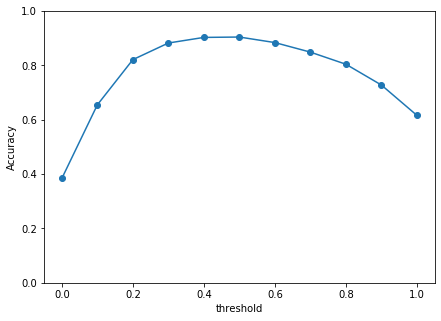

In [8]:
import matplotlib.pyplot as plt

# mettere i nomi degli assi
# range y --> da 0 a 1
plt.figure(figsize = (7,5))
plt.plot(thr,accs, '-o')
plt.ylim(0,1)
plt.xlabel('threshold')
plt.ylabel('Accuracy')

## To see the performance of the random forest estimator with the model already built see as follows

In [3]:
saved_model = h2o.load_model('C:\\Users\\Simone\\Desktop\\MLTOX-Simone\\script sistemati\\output\\DRF_model_python_1599479695763_172')
saved_model

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1599479695763_172


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,250.0,250.0,3726297.0,20.0,20.0,20.0,537.0,1714.0,1174.1




ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.08075700917223223
RMSE: 0.2841777774074395
LogLoss: 0.2837144155786281
Mean Per-Class Error: 0.10453311357506745
AUC: 0.9589427809409649
AUCPR: 0.9714484691091707
Gini: 0.9178855618819297

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5158790587329856: 


,,0,1,Error,Rate
0,0,5911.0,1189.0,0.1675,(1189.0/7100.0)
1,1,621.0,11129.0,0.0529,(621.0/11750.0)
2,Total,6532.0,12318.0,0.096,(1810.0/18850.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.515879,0.924796,213.0
1,max f2,0.355976,0.950793,264.0
2,max f0point5,0.691849,0.928550,155.0
3,max accuracy,0.522694,0.904032,211.0
4,max precision,0.992886,1.000000,0.0
5,max recall,0.024384,1.000000,395.0
6,max specificity,0.992886,1.000000,0.0
7,max absolute_mcc,0.522694,0.794037,211.0
8,max min_per_class_accuracy,0.631539,0.894930,175.0
9,max mean_per_class_accuracy,0.615967,0.895467,181.0



Gains/Lift Table: Avg response rate: 62,33 %, avg score: 62,24 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010027,0.977207,1.604255,1.604255,1.000000,0.981278,1.000000,0.981278,0.016085,0.016085,60.425532,60.425532
1,,2,0.020000,0.972713,1.578656,1.591489,0.984043,0.975017,0.992042,0.978156,0.015745,0.031830,57.865550,59.148936
2,,3,0.030027,0.969317,1.604255,1.595752,1.000000,0.971142,0.994700,0.975814,0.016085,0.047915,60.425532,59.575220
3,,4,0.040000,0.965869,1.587189,1.593617,0.989362,0.967469,0.993369,0.973733,0.015830,0.063745,58.718877,59.361702
4,,5,0.050027,0.962939,1.587279,1.592347,0.989418,0.964340,0.992577,0.971850,0.015915,0.079660,58.727907,59.234674
5,,6,0.100000,0.951733,1.599146,1.595745,0.996815,0.957231,0.994695,0.964544,0.079915,0.159574,59.914623,59.574468
6,,7,0.150027,0.940305,1.594048,1.595179,0.993637,0.945902,0.994342,0.958328,0.079745,0.239319,59.404797,59.517891
7,,8,0.200000,0.927160,1.588928,1.593617,0.990446,0.933910,0.993369,0.952227,0.079404,0.318723,58.892804,59.361702
8,,9,0.300000,0.893467,1.551489,1.579574,0.967109,0.911615,0.984615,0.938689,0.155149,0.473872,55.148936,57.957447
9,,10,0.400000,0.842860,1.540426,1.569787,0.960212,0.870086,0.978515,0.921539,0.154043,0.627915,54.042553,56.978723




ModelMetricsBinomial: drf
** Reported on cross-validation data. **

MSE: 0.08674206147875928
RMSE: 0.294520052761708
LogLoss: 0.299851518464165
Mean Per-Class Error: 0.11224003596044352
AUC: 0.9515425172310458
AUCPR: 0.9655896115792129
Gini: 0.9030850344620915

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5349459199146487: 


,,0,1,Error,Rate
0,0,5893.0,1207.0,0.17,(1207.0/7100.0)
1,1,779.0,10971.0,0.0663,(779.0/11750.0)
2,Total,6672.0,12178.0,0.1054,(1986.0/18850.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.534946,0.917001,212.0
1,max f2,0.358756,0.945524,271.0
2,max f0point5,0.661964,0.920757,167.0
3,max accuracy,0.538061,0.894801,211.0
4,max precision,0.987390,1.000000,0.0
5,max recall,0.024039,1.000000,396.0
6,max specificity,0.987390,1.000000,0.0
7,max absolute_mcc,0.560215,0.774815,204.0
8,max min_per_class_accuracy,0.630821,0.884596,179.0
9,max mean_per_class_accuracy,0.599923,0.887760,190.0



Gains/Lift Table: Avg response rate: 62,33 %, avg score: 62,21 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010027,0.976261,1.595767,1.595767,0.994709,0.980499,0.994709,0.980499,0.016000,0.016000,59.576720,59.576720
1,,2,0.020000,0.971436,1.595722,1.595745,0.994681,0.973908,0.994695,0.977212,0.015915,0.031915,59.572205,59.574468
2,,3,0.030027,0.967591,1.595767,1.595752,0.994709,0.969587,0.994700,0.974666,0.016000,0.047915,59.576720,59.575220
3,,4,0.040000,0.964184,1.604255,1.597872,1.000000,0.965777,0.996021,0.972450,0.016000,0.063915,60.425532,59.787234
4,,5,0.050027,0.960724,1.578791,1.594048,0.984127,0.962473,0.993637,0.970450,0.015830,0.079745,57.879095,59.404797
5,,6,0.100000,0.947385,1.582116,1.588085,0.986200,0.953499,0.989920,0.961979,0.079064,0.158809,58.211591,58.808511
6,,7,0.150027,0.935735,1.587243,1.587804,0.989396,0.941437,0.989745,0.955129,0.079404,0.238213,58.724307,58.780433
7,,8,0.200000,0.922428,1.580413,1.585957,0.985138,0.929394,0.988594,0.948699,0.078979,0.317191,58.041288,58.595745
8,,9,0.300000,0.886096,1.550638,1.574184,0.966578,0.906099,0.981256,0.934499,0.155064,0.472255,55.063830,57.418440
9,,10,0.400000,0.837724,1.522553,1.561277,0.949072,0.863384,0.973210,0.916720,0.152255,0.624511,52.255319,56.127660




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid
0,accuracy,0.89556897,0.0031520145,0.8933522,0.8941774,0.8991773
1,auc,0.9516482,0.0040782257,0.9469877,0.9533937,0.95456314
2,aucpr,0.9658971,0.004644737,0.9605864,0.96790344,0.9692014
3,err,0.10443103,0.0031520145,0.10664776,0.10582262,0.10082272
4,err_count,656.3333,27.59227,677.0,667.0,625.0
5,f0point5,0.908117,0.0061472473,0.9072551,0.90244615,0.91464967
6,f1,0.9177236,0.002056646,0.9158484,0.9173994,0.9199231
7,f2,0.9275734,0.0045868885,0.92460597,0.9328565,0.92525774
8,lift_top_group,1.6042557,0.0010587672,1.6034352,1.6054509,1.603881
9,logloss,0.2998342,0.0032583284,0.3035749,0.29761446,0.29831326



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2020-09-07 14:27:42,26 min 23.063 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-09-07 14:36:41,35 min 22.558 sec,1.0,0.387440,2.994024,0.835645,0.849196,1.364303,0.178817
2,,2020-09-07 14:36:42,35 min 23.114 sec,2.0,0.379945,2.369099,0.847483,0.863960,1.397716,0.174640
3,,2020-09-07 14:36:42,35 min 23.577 sec,3.0,0.365346,1.849963,0.861776,0.873106,1.395034,0.164744
4,,2020-09-07 14:36:43,35 min 24.131 sec,4.0,0.360499,1.613104,0.868500,0.880836,1.408194,0.163933
5,,2020-09-07 14:36:43,35 min 24.648 sec,5.0,0.351921,1.325679,0.880037,0.892199,1.424837,0.156397
6,,2020-09-07 14:36:44,35 min 25.296 sec,6.0,0.343349,1.194429,0.888651,0.899640,1.436647,0.149626
7,,2020-09-07 14:36:45,35 min 25.869 sec,7.0,0.338313,1.071897,0.894783,0.906028,1.448601,0.148200
8,,2020-09-07 14:36:49,35 min 29.911 sec,15.0,0.304297,0.398373,0.935065,0.946474,1.525268,0.120302
9,,2020-09-07 14:36:53,35 min 34.334 sec,23.0,0.293154,0.314625,0.946460,0.958781,1.550524,0.106855



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,LogP,93428.593750,1.000000,0.172740
1,Mol,80587.789062,0.862560,0.148999
2,bonds_number,49148.484375,0.526054,0.090871
3,MorganDensity,45098.093750,0.482701,0.083382
4,atom_number,39758.500000,0.425550,0.073510
5,ring_number,24968.009766,0.267242,0.046163
6,alone_atom_number,20058.677734,0.214695,0.037087
7,doubleBond,17200.255859,0.184101,0.031802
8,oh_count,8526.468750,0.091262,0.015765
9,obs_duration_mean,6732.164062,0.072057,0.012447



See the whole table with table.as_data_frame()


In [4]:
train, test = db_h.split_frame(ratios =[0.7], seed = 123)
saved_model.model_performance(test)


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.08022781194753469
RMSE: 0.28324514461422756
LogLoss: 0.283046500029475
Mean Per-Class Error: 0.09922858302882664
AUC: 0.9605785495033333
AUCPR: 0.9712527114465497
Gini: 0.9211570990066666

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5301398556729158: 


,,0,1,Error,Rate
0,0,2580.0,490.0,0.1596,(490.0/3070.0)
1,1,257.0,4669.0,0.0522,(257.0/4926.0)
2,Total,2837.0,5159.0,0.0934,(747.0/7996.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.530140,0.925930,213.0
1,max f2,0.408635,0.951526,253.0
2,max f0point5,0.689714,0.930416,159.0
3,max accuracy,0.530140,0.906578,213.0
4,max precision,0.992391,1.000000,0.0
5,max recall,0.043705,1.000000,387.0
6,max specificity,0.992391,1.000000,0.0
7,max absolute_mcc,0.530140,0.801218,213.0
8,max min_per_class_accuracy,0.626754,0.900000,179.0
9,max mean_per_class_accuracy,0.626754,0.900771,179.0



Gains/Lift Table: Avg response rate: 61,61 %, avg score: 62,13 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010005,0.975599,1.623224,1.623224,1.000000,0.978581,1.000000,0.978581,0.016240,0.016240,62.322371,62.322371
1,,2,0.020010,0.970345,1.602933,1.613079,0.987500,0.973039,0.993750,0.975810,0.016037,0.032278,60.293341,61.307856
2,,3,0.030015,0.966661,1.623224,1.616460,1.000000,0.968524,0.995833,0.973381,0.016240,0.048518,62.322371,61.646028
3,,4,0.040020,0.963446,1.602933,1.613079,0.987500,0.964894,0.993750,0.971260,0.016037,0.064555,60.293341,61.307856
4,,5,0.050025,0.961718,1.623224,1.615108,1.000000,0.962488,0.995000,0.969505,0.016240,0.080796,62.322371,61.510759
5,,6,0.100050,0.951108,1.606991,1.611050,0.990000,0.956128,0.992500,0.962817,0.080390,0.161186,60.699147,61.104953
6,,7,0.150075,0.939934,1.602933,1.608344,0.987500,0.945770,0.990833,0.957134,0.080187,0.241372,60.293341,60.834416
7,,8,0.200100,0.925973,1.606991,1.608006,0.990000,0.933297,0.990625,0.951175,0.080390,0.321762,60.699147,60.800599
8,,9,0.300025,0.892381,1.576498,1.597512,0.971214,0.909848,0.984160,0.937411,0.157531,0.479294,57.649762,59.751196
9,,10,0.400075,0.845570,1.564382,1.589227,0.963750,0.870390,0.979056,0.920650,0.156516,0.635810,56.438185,58.922684


# Multiclass

## Maximum depth tuning

In [1]:
from general_helper import *
import h2o
import matplotlib.pyplot as plt
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators import H2ORandomForestEstimator

h2o.init()


db = pd.read_csv('data/lc_db_processed.csv').drop(columns=['Unnamed: 0', 'smiles', 'pubchem2d'])

t = db['conc1_mean'].copy()
db['conc1_mean'] = multiclass_encoding(t)

target = 'conc1_mean'
predictors = db.columns.to_list()
predictors.remove(target)
predictors.remove('test_cas')

# categorical to factors
db_h = h2o.H2OFrame(db)
# occorre
for i in db.columns:
    if db[i].dtypes != 'float64':
        db_h[i] = db_h[i].asfactor()

db_h['conc1_mean'] = db_h['conc1_mean'].asfactor()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.231-b11, mixed mode)
  Starting server from C:\Users\Simone\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Simone\AppData\Local\Temp\tmp8tlk81cz
  JVM stdout: C:\Users\Simone\AppData\Local\Temp\tmp8tlk81cz\h2o_Simone_started_from_python.out
  JVM stderr: C:\Users\Simone\AppData\Local\Temp\tmp8tlk81cz\h2o_Simone_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Europe/Berlin
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.5
H2O_cluster_version_age:,2 months and 17 days
H2O_cluster_name:,H2O_from_python_Simone_bn7pkq
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.643 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%


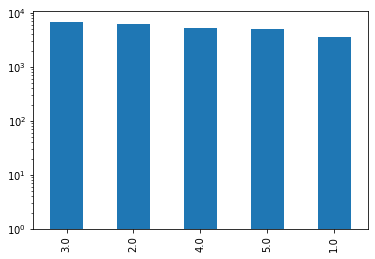

In [2]:
t.value_counts().plot(kind='bar', log = True)

In [ ]:
###### splitting
train, test = db_h.split_frame(ratios = [0.7])


# dizionario dei parametri per il grid-search
hyper_params = {'max_depth': [int(i) for i in np.linspace(5,50,16)]}

# Random Forest
drf_grid = H2ORandomForestEstimator(max_runtime_secs = 3600, seed = 123, nfolds = 3, stopping_rounds = 5,
                                    stopping_metric = "rmse", stopping_tolerance = 1e-4,
                                    categorical_encoding = 'eigen')

# grid search
grid = H2OGridSearch(drf_grid, hyper_params, grid_id = 'depth_grid_multiclass', 
                     search_criteria = {'strategy': "Cartesian"})
grid.train(x = predictors, y = target, training_frame = train)
grid

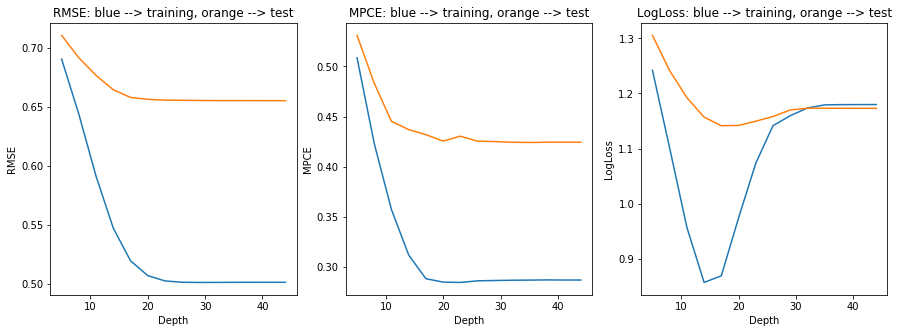

In [5]:
sorted_grid = grid.get_grid(sort_by='rmse',decreasing=True)
md_lst = list()

rmse_test_lst = list()
rmse_tr_lst = list()

mpce_test = list()
mpce_train = list()

ll_test = list()
ll_train = list()

for i in range(0,14):
    model = h2o.get_model(sorted_grid.sorted_metric_table()['model_ids'][i])
    performance_test_model = model.model_performance(test)
    performance_train_model = model.model_performance()
    
    md_lst.append(model.actual_params['max_depth'])
    
    rmse_test_lst.append(performance_test_model.rmse())
    rmse_tr_lst.append(performance_train_model.rmse())
    
    mpce_test.append(performance_test_model.mean_per_class_error())
    mpce_train.append(performance_train_model.mean_per_class_error())
    
    ll_test.append(performance_test_model.logloss())
    ll_train.append(performance_train_model.logloss())
    
tmp = pd.DataFrame({'depth':md_lst,
              'logloss_train':ll_train,
              'logloss_test':ll_test,
              'mpce_train':mpce_train,
              'mpce_test':mpce_test,
              'rmse_train':rmse_tr_lst, 
              'rmse_test':rmse_test_lst}).sort_values('depth')

plt.figure(figsize = [15,5])

plt.subplot(1,3,1)
plt.plot(tmp['depth'],tmp['rmse_train'])
plt.plot(tmp['depth'],tmp['rmse_test'])
plt.xlabel('Depth')
plt.ylabel('RMSE')
plt.title('RMSE: blue --> training, orange --> test')

plt.subplot(1,3,2)
plt.plot(tmp['depth'],tmp['mpce_train'])
plt.plot(tmp['depth'],tmp['mpce_test'])
plt.xlabel('Depth')
plt.ylabel('MPCE')
plt.title('MPCE: blue --> training, orange --> test')

plt.subplot(1,3,3)
plt.plot(tmp['depth'],tmp['logloss_train'])
plt.plot(tmp['depth'],tmp['logloss_test'])
plt.xlabel('Depth')
plt.ylabel('LogLoss')
plt.title('LogLoss: blue --> training, orange --> test')

# plt.savefig('MULTICLASS_logloss_rmse_mpce.png')
plt.show()

# MEGA GRID -- MULTICLASS

In [2]:
# splitting
train, test = db_h.split_frame(ratios = [0.7])

import math

hyper_params_tune = {'max_depth' : [10,13,17,20],
                'sample_rate': [x/100. for x in range(20,101)],
                'col_sample_rate_per_tree': [x/100. for x in range(20,101)],
                'col_sample_rate_change_per_level': [x/100. for x in range(90,111)],
                'min_rows': [2**x for x in range(0,int(math.log(train.nrow,2)-1)+1)],
                'nbins': [2**x for x in range(4,11)],
                'nbins_cats': [2**x for x in range(4,13)],
                'min_split_improvement': [0,1e-8,1e-6,1e-4],
                'histogram_type': ["UniformAdaptive","QuantilesGlobal","RoundRobin"]}

search_criteria_tune = {'strategy': "RandomDiscrete",
                   'max_runtime_secs': 3600,  ## limit the runtime to 60 minutes
                   'max_models': 90,  ## build no more than 100 models
                   'seed' : 1234,
                   'stopping_rounds' : 5,
                   'stopping_metric' : "rmse",
                   'stopping_tolerance': 1e-4
                   }

# gradient boosting
gbm_grid_all = H2ORandomForestEstimator(
        ntrees = 100,
        max_runtime_secs = 3600, # 1 hour
        seed = 123,
        categorical_encoding = 'eigen')

# grid search
gall = H2OGridSearch(gbm_grid_all,
                     hyper_params_tune,
                     grid_id = 'final_grid',
                     search_criteria = search_criteria_tune)

gall.train(x=predictors, 
           y=target,
           max_runtime_secs = 3600, 
           training_frame = train)
gall

drf Grid Build progress: |████████████████████████████████████████████████| 100%
      col_sample_rate_change_per_level col_sample_rate_per_tree  \
0                                 1.08                     0.72   
1                                 1.08                     0.81   
2                                 0.96                     0.66   
3                                 1.08                     0.45   
4                                  1.0                     0.67   
.. ..                              ...                      ...   
85                                1.04                     0.26   
86                                1.08                     0.66   
87                                1.07                     0.73   
88                                 0.9                     0.82   
89                                1.09                     0.91   

     histogram_type max_depth min_rows min_split_improvement nbins nbins_cats  \
0   QuantilesGlobal        20    

In [5]:
print(gall.get_grid(sort_by = 'rmse', decreasing = False))

      col_sample_rate_change_per_level col_sample_rate_per_tree  \
0                                 1.08                     0.72   
1                                 1.08                     0.81   
2                                 1.09                     0.91   
3                                 0.96                     0.66   
4                                  1.0                      0.3   
.. ..                              ...                      ...   
85                                1.06                     0.27   
86                                0.92                     0.44   
87                                1.07                     0.73   
88                                 0.9                     0.82   
89                                1.08                     0.66   

     histogram_type max_depth min_rows min_split_improvement nbins nbins_cats  \
0   QuantilesGlobal        20      1.0                1.0E-8  1024        128   
1   QuantilesGlobal        13    

In [2]:
train, test = db_h.split_frame(ratios = [0.7])

# nfolds = 3
model1 = H2ORandomForestEstimator(ntrees = 100, max_depth = 20, min_rows = 1,
                                 nbins = 1024, nbins_cats = 128, seed = 123, sample_rate = 0.36,
                                  col_sample_rate_change_per_level = 1.08,
                                 col_sample_rate_per_tree = 0.72, min_split_improvement = 1e-8, 
                                 histogram_type = 'QuantilesGlobal', categorical_encoding = 'one_hot_explicit')

model1.train(x = predictors, y = target, training_frame = train)
print(model1)
print(model1.model_performance(test))

drf Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1599231406103_1


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,100.0,500.0,4473881.0,20.0,20.0,20.0,285.0,1140.0,701.766




ModelMetricsMultinomial: drf
** Reported on train data. **

MSE: 0.29623670745740766
RMSE: 0.5442763153559115
LogLoss: 0.8284792174511146
Mean Per-Class Error: 0.2695584752827084

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,1,2,3,4,5,Error,Rate
0,1915.0,447.0,101.0,35.0,31.0,0.242784,614 / 2.529
1,332.0,3266.0,622.0,98.0,38.0,0.250230,1.090 / 4.356
2,120.0,662.0,3413.0,426.0,141.0,0.283284,1.349 / 4.762
3,52.0,189.0,707.0,2262.0,430.0,0.378571,1.378 / 3.640
4,19.0,73.0,186.0,409.0,2874.0,0.192923,687 / 3.561
5,2438.0,4637.0,5029.0,3230.0,3514.0,0.271541,5.118 / 18.848



Top-5 Hit Ratios: 


,k,hit_ratio
0,1,0.728459
1,2,0.898663
2,3,0.961004
3,4,0.987903
4,5,1.000000



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error
0,,2020-09-04 16:58:35,0.415 sec,0.0,NaN,NaN,NaN
1,,2020-09-04 20:25:01,3:26:26.989,1.0,0.622355,7.914854,0.429388
2,,2020-09-04 20:25:06,3:26:31.786,4.0,0.578498,2.709735,0.375884
3,,2020-09-04 20:25:10,3:26:36.114,7.0,0.566308,1.283411,0.344926
4,,2020-09-04 20:25:15,3:26:40.699,10.0,0.556822,0.982913,0.321626
5,,2020-09-04 20:25:20,3:26:45.589,13.0,0.549250,0.910900,0.306186
6,,2020-09-04 20:25:24,3:26:49.819,16.0,0.549660,0.884721,0.301783
7,,2020-09-04 20:25:28,3:26:54.100,19.0,0.548041,0.861331,0.296159
8,,2020-09-04 20:25:32,3:26:58.271,22.0,0.549632,0.860781,0.293718
9,,2020-09-04 20:25:37,3:27:02.724,25.0,0.550231,0.855479,0.293081



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Mol,49422.503906,1.000000,0.132403
1,LogP,45436.718750,0.919353,0.121725
2,bonds_number,27321.566406,0.552816,0.073195
3,MorganDensity,25395.093750,0.513837,0.068034
4,atom_number,23756.996094,0.480692,0.063645
5,obs_duration_mean,6928.702148,0.140193,0.018562
6,ring_number.1,4731.622559,0.095738,0.012676
7,ring_number.0,4553.883789,0.092142,0.012200
8,ring_number.3,4342.896484,0.087873,0.011635
9,control_type.C,4023.139404,0.081403,0.010778



See the whole table with table.as_data_frame()


ModelMetricsMultinomial: drf
** Reported on test data. **

MSE: 0.2971547702989014
RMSE: 0.545119042319108
LogLoss: 0.8262589317218317
Mean Per-Class Error: 0.2697318852959081

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,1,2,3,4,5,Error,Rate
0,853.0,182.0,53.0,17.0,14.0,0.237712,266 / 1.119
1,143.0,1362.0,274.0,40.0,24.0,0.260988,481 / 1.843
2,62.0,305.0,1489.0,161.0,50.0,0.279632,578 / 2.067
3,23.0,60.0,293.0,945.0,193.0,0.375826,569 / 1.514
4,7.0,20.0,74.0,182.0,1172.0,0.194502,283 / 1.455
5,1088.0,1929.0,2183.0,1345.0,1453.0,0.272193,2.177 / 7.998



Top-5 Hit Ratios: 


,k,hit_ratio
0,1,0.727807
1,2,0.903226
2,3,0.963866
3,4,0.989747
4,5,1.000000


In [83]:
# Accuracy
(853+1362+1489+945+1172)/7998

0.7278069517379345

In [ ]:
train, test = db_h.split_frame(ratios = [0.7])

# nfolds = 3
model1 = H2ORandomForestEstimator(ntrees = 100, max_depth = 20, min_rows = 1,
                                 nbins = 1024, nbins_cats = 128, seed = 123, sample_rate = 0.36,
                                  col_sample_rate_change_per_level = 1.08,
                                 col_sample_rate_per_tree = 0.72, min_split_improvement = 1e-8, 
                                 histogram_type = 'QuantilesGlobal', categorical_encoding = 'eigen')

model1.train(x = predictors, y = target, training_frame = train)
print(model1)
print(model1.model_performance(test))